In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import re
from collections import Counter
from itertools import chain
import os

%matplotlib inline

In [4]:
from dtu_denovo_sequencing.dataset import load_all

# Dataset V1

### Loading dataset:

In [5]:
path = '../data/denovo_dataset_v1/'
df = load_all(path)
df.shape

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1008/1008 [01:10<00:00, 14.35it/s]


(2655403, 12)

In [6]:
df.head(3)

,Evidence index,Scan Number,Sequence,Modified sequence,MS/MS m/z,m/z,Mass,Charge,Retention time,Mass values,Intensity,Normalized intensity
0,0,33603,AAAAELSLLEK,_AAAAELSLLEK_,558.3188,558.318971,1114.62339,2,38.021,"[100.27822875976562, 100.28643035888672, 100.3...","[230654.97, 39952.027, 76809.125, 8558.851, 25...","[0.008991628, 0.0015574509, 0.002994252, 0.000..."
1,1,12659,AAAANIDEVQK,_AAAANIDEVQK_,565.2959,565.296027,1128.57750,2,20.152,"[101.13959503173828, 101.82844543457031, 101.8...","[22993.088, 517718.72, 84582.305, 139626.16, 5...","[0.0007417011, 0.016700348, 0.0027284196, 0.00..."
2,2,13715,AAAANIDEVQK,_AAAANIDEVQK_,565.2964,565.296027,1128.57750,2,21.014,"[100.26371002197266, 100.71353149414062, 101.0...","[4932.054, 4110.7993, 5568.118, 15293.063, 122...","[0.0048124897, 0.004011144, 0.005433134, 0.014..."


## Dataset distributions
Sequence length and Spectrum length

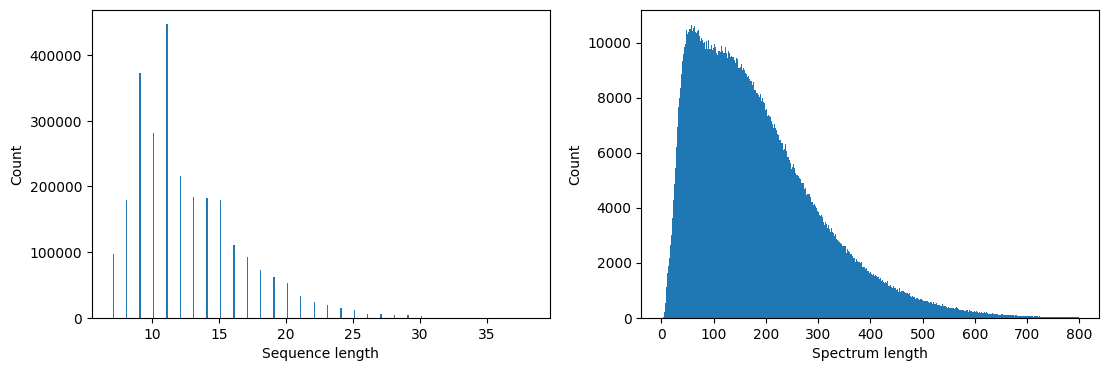

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(13,4))

seq_len = df['Sequence'].map(len)
ax[0].hist(seq_len, bins=np.arange(seq_len.min(),40)-0.4, rwidth=0.1)
ax[0].set_xlabel('Sequence length')
ax[0].set_ylabel('Count')

spec_len = df['Mass values'].map(len)
ax[1].hist(spec_len, bins=np.arange(spec_len.min(),800)-0.4, rwidth=1)
ax[1].set_xlabel('Spectrum length')
ax[1].set_ylabel('Count')

plt.show()

Number of occurences per sequence

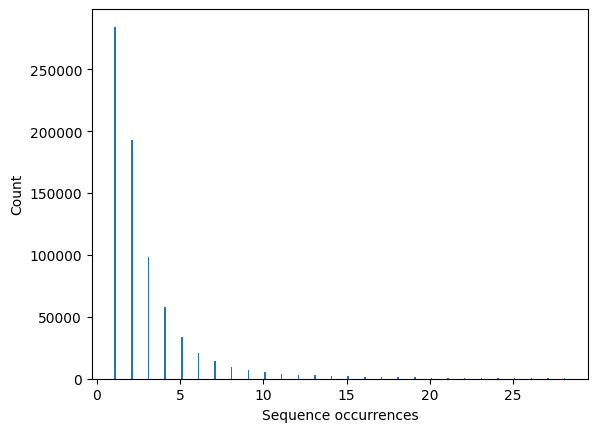

'4252 out of 754638 unique sequences have more than 30 occurrences'

In [8]:
unique_counts = df['Sequence'].value_counts()
plt.hist(unique_counts, bins=np.arange(1,30, 1)-0.4, rwidth=0.09)
plt.xlabel('Sequence occurrences')
plt.ylabel('Count')
plt.show()
f"{(unique_counts>30).sum()} out of {unique_counts.shape[0]} unique sequences have more than 30 occurrences"

m/z and retention time distributions

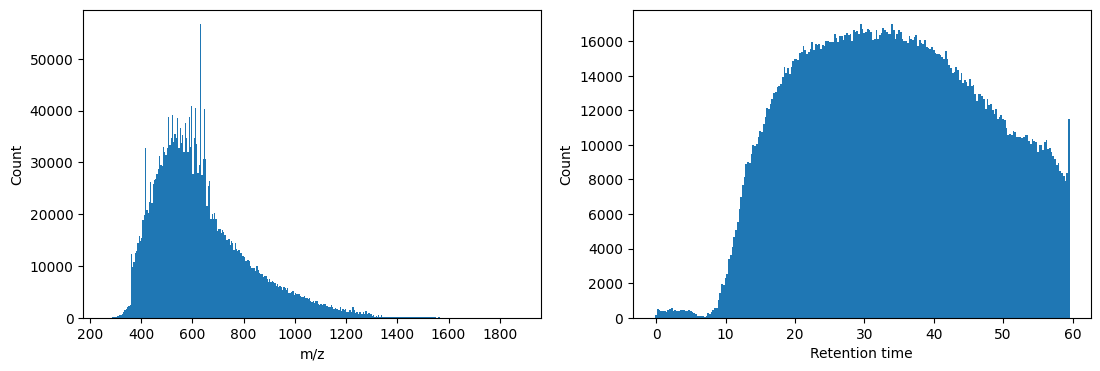

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(13,4))

mz = df['m/z']
ax[0].hist(mz, bins=np.arange(mz.min(),mz.max(), 5)-0.4, rwidth=1)
ax[0].set_xlabel('m/z')
ax[0].set_ylabel('Count')

rt = df['Retention time']
ax[1].hist(rt, bins=np.arange(rt.min(),rt.max(), 0.25)-0.4, rwidth=1)
ax[1].set_xlabel('Retention time')
ax[1].set_ylabel('Count')

plt.show()

Amino acid frequency

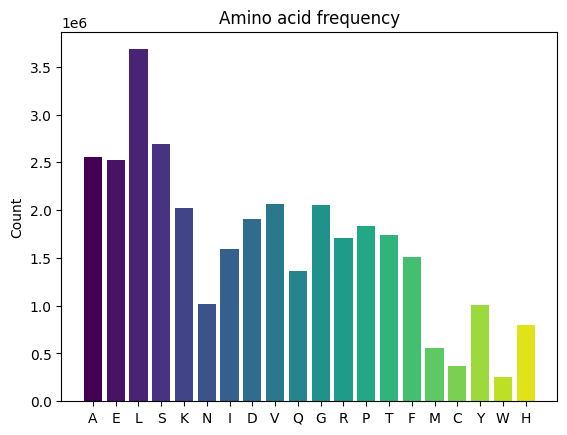

In [10]:
unique_aa = Counter(chain.from_iterable(df['Sequence']))

plt.bar(unique_aa.keys(), unique_aa.values(), color=plt.colormaps.get('viridis')(np.arange(len(unique_aa))/len(unique_aa)))
plt.ylabel('Count')
plt.title('Amino acid frequency')
plt.show()

## Amino acid oxidation modifications

In [11]:
ox_count = df['Modified sequence'].map(lambda x: x.count('(ox)'))
f"Total oxidation count: {ox_count.sum()}"

'Total oxidation count: 316579'

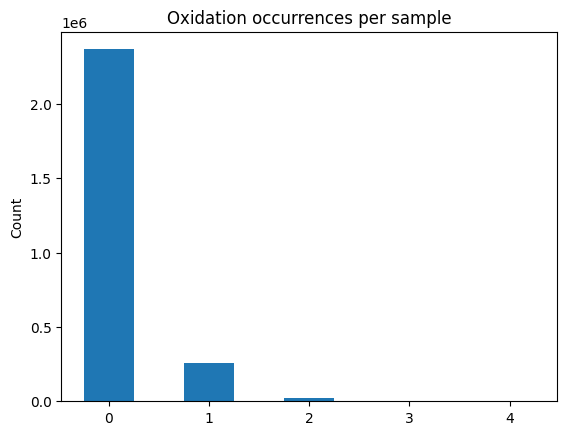

In [12]:
plt.hist(ox_count, bins=np.arange(0,ox_count.max()+1, 1)-0.5, rwidth=0.5)
plt.title('Oxidation occurrences per sample')
plt.ylabel('Count')
plt.show()

In [13]:
ox_pos = df['Modified sequence'].map(lambda x: np.array([m.start() for m in re.finditer('(ox)', x)]))

In [14]:
all_prepends = []
for pos, seq in zip(ox_pos, df['Modified sequence']):
    if len(pos) == 0:
        continue
    all_prepends += list(np.array(list(seq))[pos-2])

In [15]:
np.unique(all_prepends, return_counts=True)

(array(['M'], dtype='<U1'), array([316579]))

We only have M as an oxidation prepend

# Dataset V2

### Loading dataset:

ToDo...